In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Data Loading

In [3]:
df = pd.read_csv("H2HBABBA3114.csv")

# Data Preprocessing

In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,140106271,LONGO corporation,27-02-2020 00:00,2020,2960613801,10-02-2020,20200210,20200210,20200221,CAD,RV,1,NaN,79736.49,20200211,CA10,2.960614e+09,0
1,U001,200769623,WAL-MAR co,21-05-2019 00:00,2019,1929289995,11-05-2019,20190510,20190511,20190526,USD,RV,1,NaN,9690.20,20190511,NAH4,1.929290e+09,0
2,U001,200769623,WAL-MAR,27-02-2019 00:00,2019,1928799961,17-02-2019,20190215,20190217,20190304,USD,RV,1,NaN,14635.92,20190217,NAH4,1.928800e+09,0
3,U001,200706844,WINC llc,29-05-2019 00:00,2019,1929014762,24-03-2019,20190322,20190324,20190528,USD,RV,1,NaN,5410.71,20190324,NAGD,1.929015e+09,0
4,U001,200744019,TARG corp,NaN,2020,1930621867,10-03-2020,20200307,20200310,20200325,USD,RV,1,NaN,5931.36,20200310,NAA8,1.930622e+09,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

## 1. Removing Unwanted Columns

In [7]:
df.drop('area_business',axis='columns', inplace=True) # droping area_business coloumn because of having null values 
df.drop('document_create_date.1',axis='columns', inplace=True) # droping area_business coloumn because of having null values 
df.drop('posting_id',axis='columns', inplace=True) # droping area_business coloumn because of having null values 
df.drop('document type',axis='columns', inplace=True) # droping area_business coloumn because of having null values 

## 2. Remove Null Rows

In [8]:
df_new = df.dropna(how='any', axis=0) # Droping rows with any number of null values

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         39998 non-null  object 
 1   cust_number           39998 non-null  object 
 2   name_customer         39998 non-null  object 
 3   clear_date            39998 non-null  object 
 4   buisness_year         39998 non-null  int64  
 5   doc_id                39998 non-null  int64  
 6   posting_date          39998 non-null  object 
 7   document_create_date  39998 non-null  int64  
 8   due_in_date           39998 non-null  int64  
 9   invoice_currency      39998 non-null  object 
 10  total_open_amount     39998 non-null  float64
 11  baseline_create_date  39998 non-null  int64  
 12  cust_payment_terms    39998 non-null  object 
 13  invoice_id            39998 non-null  float64
 14  isOpen                39998 non-null  int64  
dtypes: float64(2), int6

In [10]:
df_new.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,140106271,LONGO corporation,27-02-2020 00:00,2020,2960613801,10-02-2020,20200210,20200221,CAD,79736.49,20200211,CA10,2.960614e+09,0
1,U001,200769623,WAL-MAR co,21-05-2019 00:00,2019,1929289995,11-05-2019,20190510,20190526,USD,9690.20,20190511,NAH4,1.929290e+09,0
2,U001,200769623,WAL-MAR,27-02-2019 00:00,2019,1928799961,17-02-2019,20190215,20190304,USD,14635.92,20190217,NAH4,1.928800e+09,0
3,U001,200706844,WINC llc,29-05-2019 00:00,2019,1929014762,24-03-2019,20190322,20190528,USD,5410.71,20190324,NAGD,1.929015e+09,0
5,U001,CCU013,KRAFT F systems,27-09-2019 00:00,2019,1929791025,26-08-2019,20190826,20190826,USD,14654.80,20190826,NAX2,1.929791e+09,0


## 3. Change Date Format

In [11]:
import datetime as dt

In [12]:
#dividing the year, month,date from the number and changing the format

def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)

In [13]:
df_new['due_in_date'] = pd.to_numeric(df_new['due_in_date'], downcast='integer') #changing the float type to integer

In [14]:
df_new['baseline_create_date'] = pd.to_numeric(df_new['baseline_create_date'], downcast='integer') #changing float to integer

In [15]:
df_new['due_in_date'] = df_new['due_in_date'].apply(date_format) #changing the integer to year-month-date format

In [16]:
df_new['document_create_date'] = df_new['document_create_date'].apply(date_format) #changing the integer to year-month-date form

In [17]:
df_new['baseline_create_date'] = df_new['baseline_create_date'].apply(date_format) #changing integer type to year-month-date form

In [18]:
df_new['clear_date']= pd.to_datetime(df_new['clear_date']) #changing object type to datetime format

In [19]:
df_new.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,140106271,LONGO corporation,2020-02-27,2020,2960613801,10-02-2020,2020-02-10,2020-02-21,CAD,79736.49,2020-02-11,CA10,2.960614e+09,0
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,USD,9690.20,2019-05-11,NAH4,1.929290e+09,0
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,USD,14635.92,2019-02-17,NAH4,1.928800e+09,0
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,USD,5410.71,2019-03-24,NAGD,1.929015e+09,0
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,USD,14654.80,2019-08-26,NAX2,1.929791e+09,0


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39998 non-null  object        
 1   cust_number           39998 non-null  object        
 2   name_customer         39998 non-null  object        
 3   clear_date            39998 non-null  datetime64[ns]
 4   buisness_year         39998 non-null  int64         
 5   doc_id                39998 non-null  int64         
 6   posting_date          39998 non-null  object        
 7   document_create_date  39998 non-null  datetime64[ns]
 8   due_in_date           39998 non-null  datetime64[ns]
 9   invoice_currency      39998 non-null  object        
 10  total_open_amount     39998 non-null  float64       
 11  baseline_create_date  39998 non-null  datetime64[ns]
 12  cust_payment_terms    39998 non-null  object        
 13  invoice_id      

## 4. Creating the Target Variable

In [21]:
df_new['delay'] = (df_new['clear_date'] - df_new['due_in_date']).dt.days

In [22]:
df_new.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,CA02,140106271,LONGO corporation,2020-02-27,2020,2960613801,10-02-2020,2020-02-10,2020-02-21,CAD,79736.49,2020-02-11,CA10,2.960614e+09,0,6
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,USD,9690.20,2019-05-11,NAH4,1.929290e+09,0,-5
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,USD,14635.92,2019-02-17,NAH4,1.928800e+09,0,-5
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,USD,5410.71,2019-03-24,NAGD,1.929015e+09,0,1
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,USD,14654.80,2019-08-26,NAX2,1.929791e+09,0,32


## 5. Train Test Split

In [23]:
x_train = df_new[df_new['document_create_date'] <= '2020-01-01'].copy() #using Deep copy technique 
x_test = df_new[df_new['document_create_date'] > '2020-01-01'].copy() #using deep copy technique

In [24]:
print(x_train.shape, x_test.shape)

(35178, 16) (4820, 16)


In [25]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,USD,9690.20,2019-05-11,NAH4,1.929290e+09,0,-5
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,USD,14635.92,2019-02-17,NAH4,1.928800e+09,0,-5
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,USD,5410.71,2019-03-24,NAGD,1.929015e+09,0,1
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,USD,14654.80,2019-08-26,NAX2,1.929791e+09,0,32
6,CA02,140106408,WAL-M us,2019-08-03,2019,2960529706,18-02-2019,2019-02-18,2019-02-28,CAD,15440.89,2019-02-18,CA10,2.960530e+09,0,156


In [26]:
x_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,CA02,140106271,LONGO corporation,2020-02-27,2020,2960613801,10-02-2020,2020-02-10,2020-02-21,CAD,79736.49,2020-02-11,CA10,2.960614e+09,0,6
13,U001,CCCA02,KRAFT corporation,2020-02-28,2020,1930384514,19-01-2020,2020-01-10,2020-02-23,USD,62504.40,2020-01-19,NAG2,1.930385e+09,0,5
17,U001,CCCA02,KRAFT llc,2020-02-28,2020,1930351602,05-01-2020,2020-01-03,2020-02-09,USD,18666.08,2020-01-05,NAG2,1.930352e+09,0,19
23,U001,200769556,SHAM,2020-01-14,2020,1930366322,09-01-2020,2020-01-07,2020-01-24,USD,25477.58,2020-01-09,NAA8,1.930366e+09,0,-10
37,U001,200772670,ASSOCIAT foundation,2020-04-02,2020,1930429974,22-01-2020,2020-01-22,2020-02-06,USD,45936.96,2020-01-22,NAU5,1.930430e+09,0,56


In [27]:
x_train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,delay
count,35178.000000,3.517800e+04,3.517800e+04,3.517800e+04,35178.0,35178.000000
mean,2019.008272,2.012320e+09,3.212665e+04,2.012320e+09,0.0,-5.612229
std,0.090576,2.785325e+08,4.020220e+04,2.785325e+08,0.0,88.960661
min,2019.000000,1.928502e+09,4.380000e+00,1.928502e+09,0.0,-334.000000
25%,2019.000000,1.929102e+09,4.742550e+03,1.929102e+09,0.0,-5.000000
50%,2019.000000,1.929614e+09,1.718546e+04,1.929614e+09,0.0,0.000000
75%,2019.000000,1.930032e+09,4.659104e+04,1.930032e+09,0.0,4.000000
max,2020.000000,2.960605e+09,1.673456e+06,2.960605e+09,0.0,321.000000


# EDA and Feature Engineering

In [28]:
import sweetviz as sv

In [ ]:
report = sv.analyze(x_train)

In [33]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (50000, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    19 Predictors classified...
        This does not include the Target column(s)
        7 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


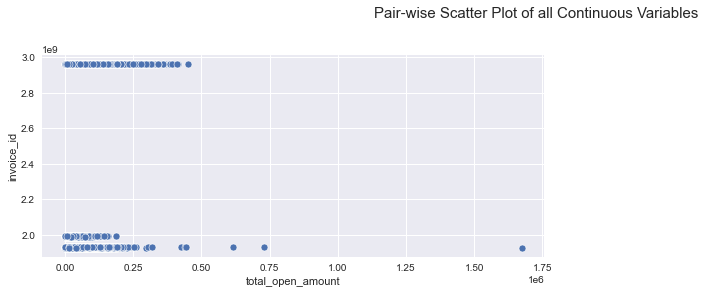

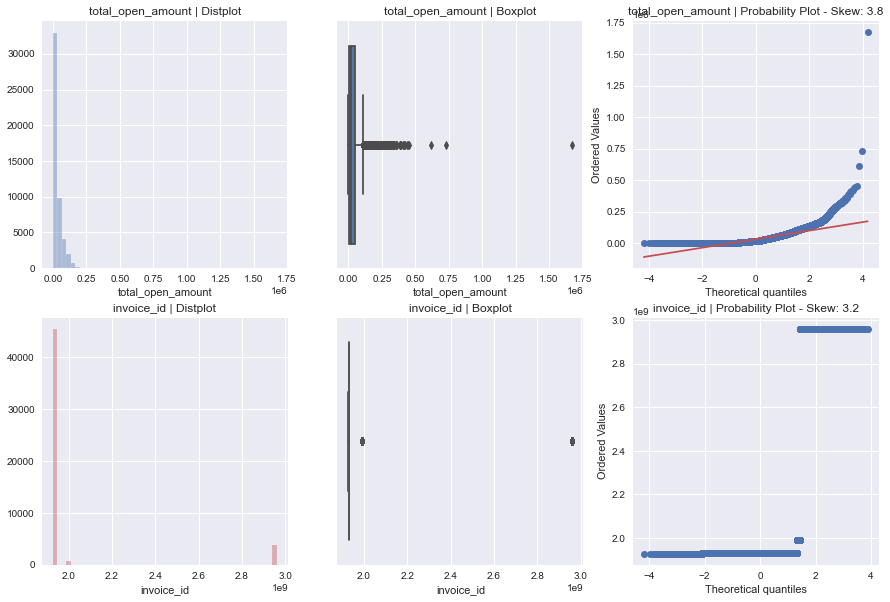

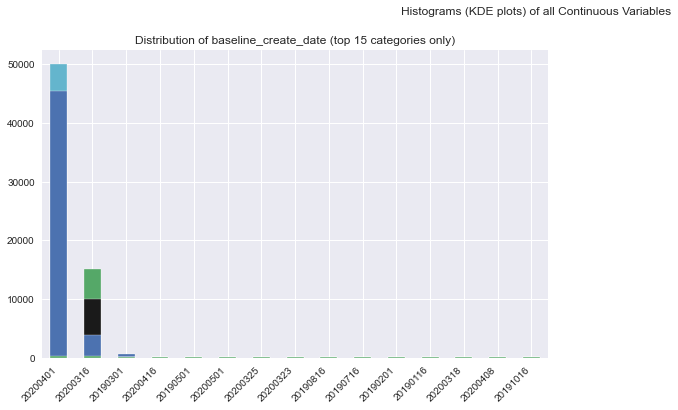

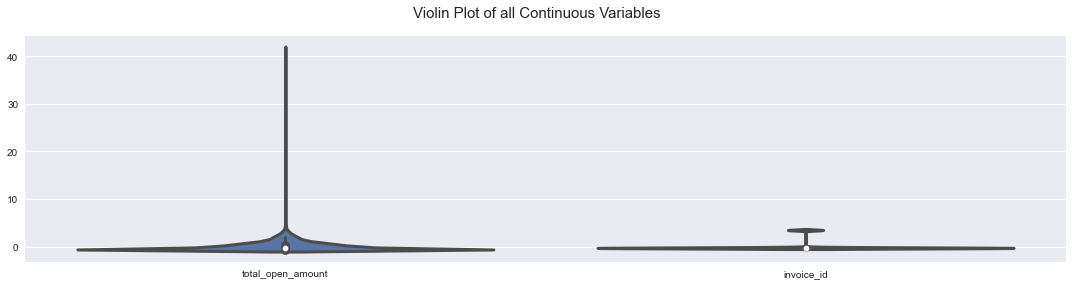

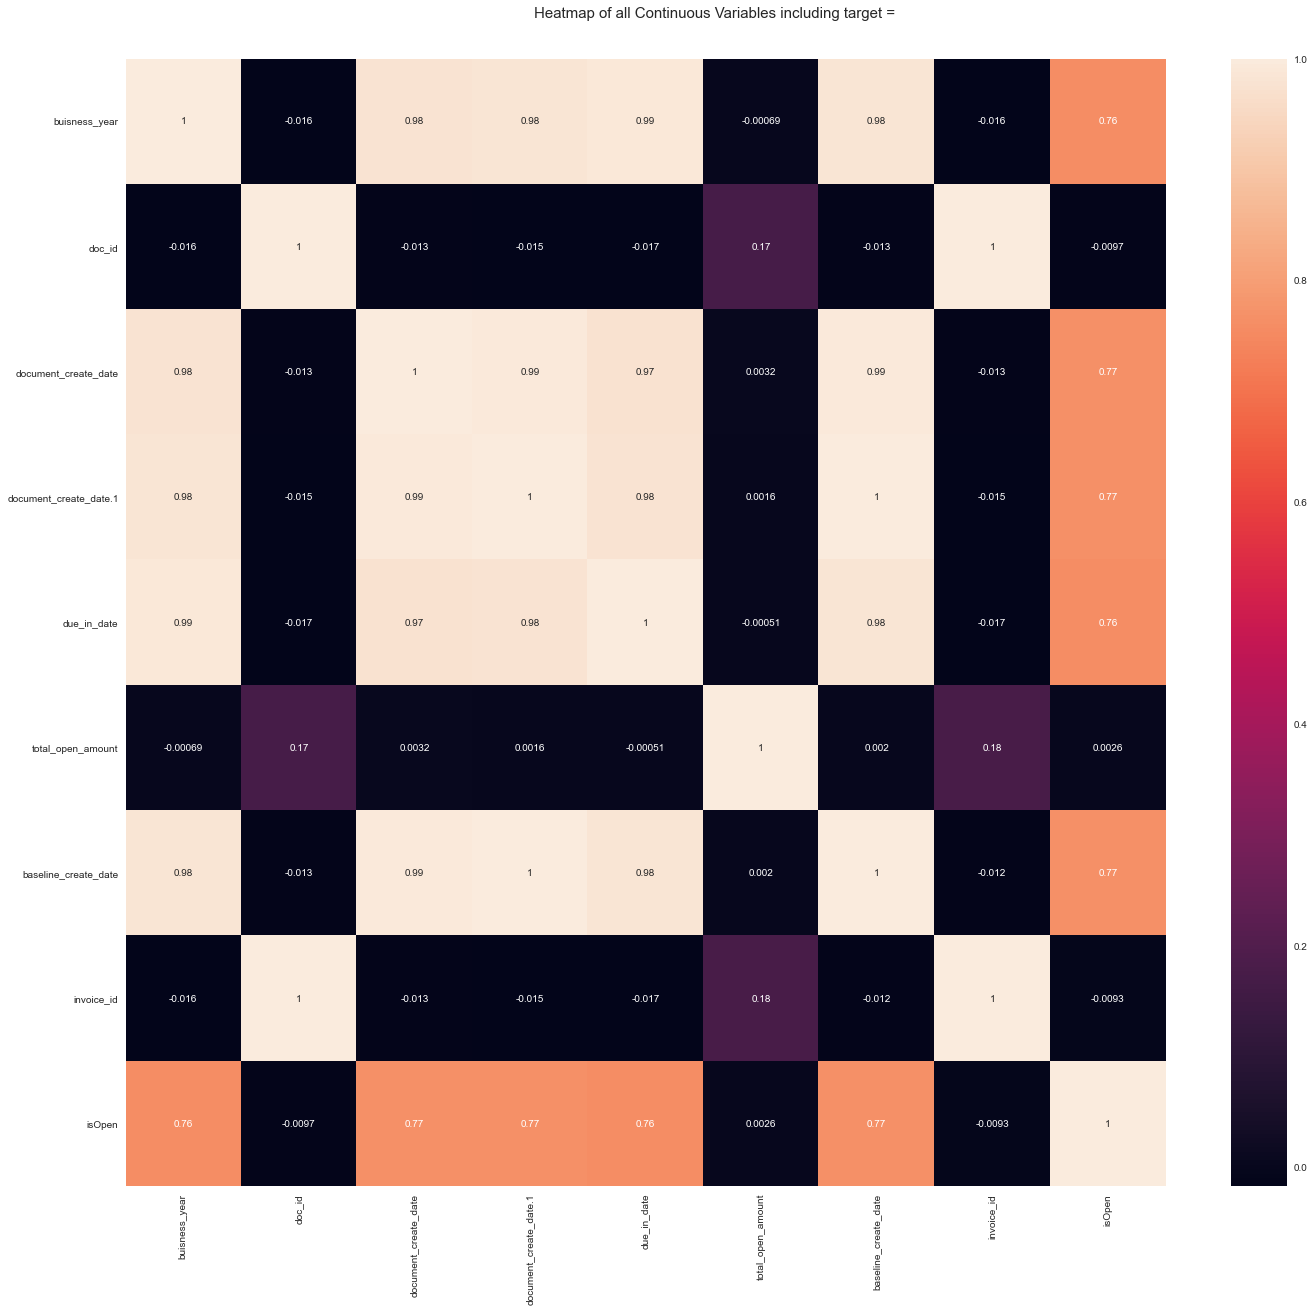

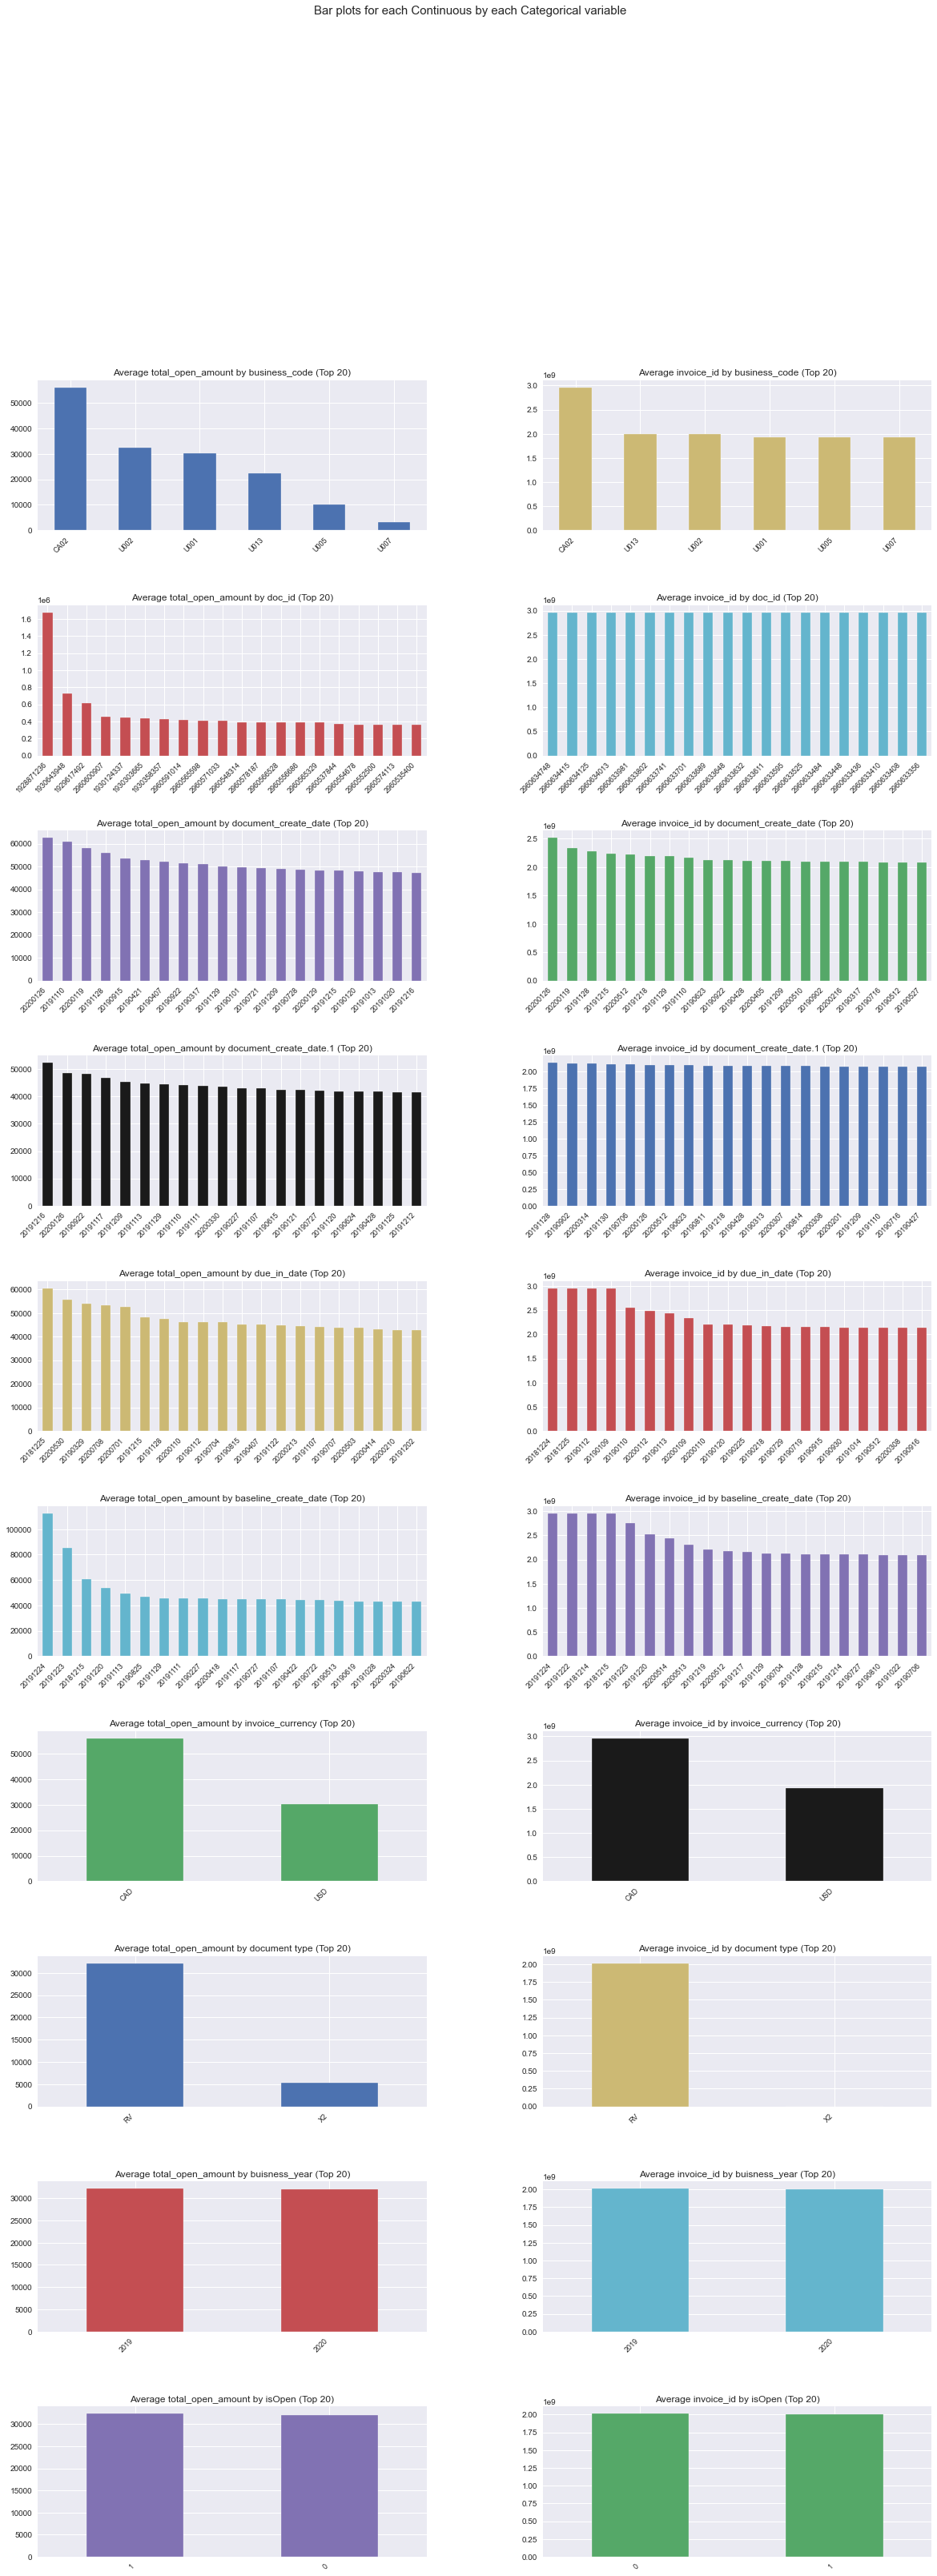

Time to run AutoViz (in seconds) = 17.698

 ###################### VISUALIZATION Completed ########################


In [30]:
dataviz = AV.AutoViz("H2HBABBA3114.csv")

### 1. Univariate Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
plot = dict(x_train['business_code'].value_counts())
print(plot)

x_train['business_code1'] = x_train['business_code'].map(plot) #added new column to data set
x_test['business_code1'] = x_test['business_code'].map(plot) #added new column to data set

{'U001': 31805, 'CA02': 2792, 'U013': 440, 'U002': 130, 'U005': 9, 'U007': 2}


1)From above we can see that there was very few data with U002, U005, U007.                                                        
2)The business codes(U002, U005, U007) can be dropped or else we can merge them into one

<AxesSubplot:xlabel='business_code1', ylabel='Density'>

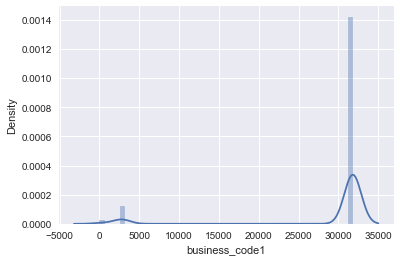

In [33]:
sns.distplot(x_train['business_code1']) #distribution plot of business codes

In [34]:
x_train = x_train.replace(['U002', 'U005', 'U007'], 'other') #replace U002, U005, U007 with other(merging)
x_test = x_test.replace(['U002', 'U005', 'U007'], 'other') #replace U002, U005, U007 with other(merging)

In [35]:
graph = dict(x_train['cust_number'].value_counts())
print(graph)

x_train['cust_number1'] = x_train['cust_number'].map(graph)

{'200769623': 8471, '200726979': 1375, '200762301': 1135, '200759878': 1013, '200794332': 911, '200744019': 755, '200772670': 627, '200705742': 599, '200707822': 520, 'CCU013': 498, '200418007': 436, '140104409': 410, 'CCCA02': 391, '140106408': 374, '200780383': 368, '100031704': 335, '200803720': 329, '140104429': 319, '200936373': 303, '200706844': 284, '200761734': 281, '200416837': 276, '200353024': 273, '200148860': 266, '200799367': 257, '200704858': 255, '200230690': 251, '200793568': 235, '140105686': 231, '200020431': 222, '140104440': 215, '200772595': 206, '200974851': 203, '200729942': 185, '200739534': 175, '200782001': 166, '200704045': 161, '200714710': 160, '200900909': 152, '200592182': 141, '200752302': 138, '200781803': 137, '200777735': 135, '200792293': 135, '200792734': 132, '200764795': 131, '140104423': 130, '200729290': 128, '140105847': 126, '200718130': 123, '200763814': 121, '200776463': 120, '200152991': 117, '200331749': 116, '200778870': 103, '200126819'

<AxesSubplot:xlabel='cust_number1', ylabel='Density'>

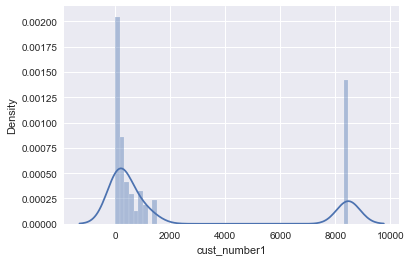

In [36]:
sns.distplot(x_train['cust_number1']) #distribution of customers

In [81]:
graph1 = dict(x_test['cust_number'].value_counts())
x_test['cust_number1'] = x_test['cust_number'].map(graph1)

### 2. Bivariate Analysis

In [37]:
plot1 = x_train.groupby(['business_code'], axis=0, as_index=False)['delay'].mean()

<AxesSubplot:xlabel='business_code', ylabel='delay'>

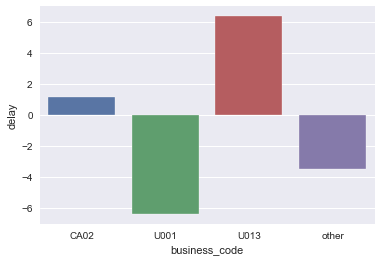

In [38]:
sns.barplot(x="business_code", y="delay",data=plot1)

<AxesSubplot:xlabel='cust_number', ylabel='delay'>

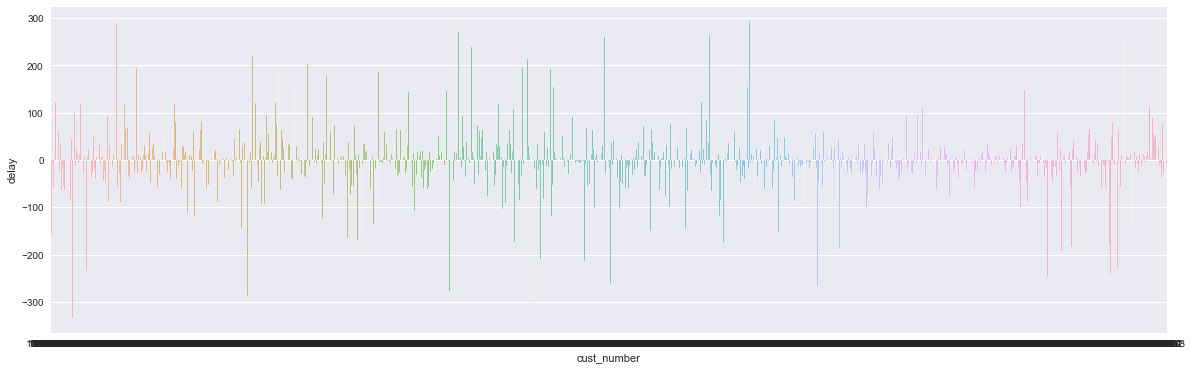

In [39]:
plot2 = pd.DataFrame(x_train.groupby(['cust_number'], axis=0, as_index=False)['delay'].mean())
plt.figure(figsize=(20,6))
sns.barplot(x="cust_number", y="delay",data=plot2) #customer vs the delay

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay'>

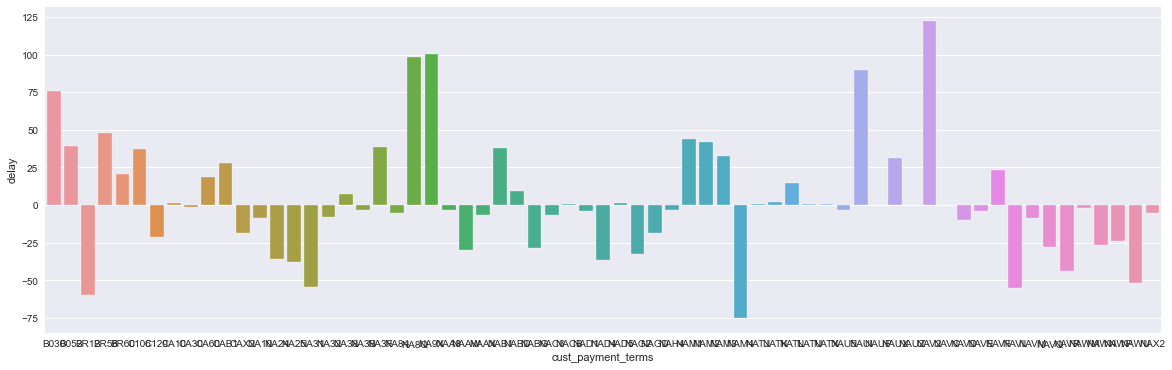

In [40]:
plot4 = pd.DataFrame(x_train.groupby(['cust_payment_terms'], axis=0, as_index=False)['delay'].mean())
plt.figure(figsize=(20,6))
sns.barplot(x="cust_payment_terms", y="delay",data=plot4)

<AxesSubplot:xlabel='buisness_year', ylabel='total_open_amount'>

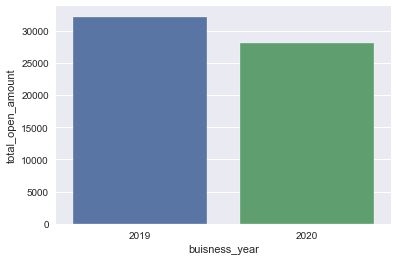

In [41]:
plot3 = pd.DataFrame(x_train.groupby(['buisness_year'], axis = 0, as_index=False)['total_open_amount'].mean())
sns.barplot(x='buisness_year', y='total_open_amount', data=plot3) # average finance happend in the partiualar year

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

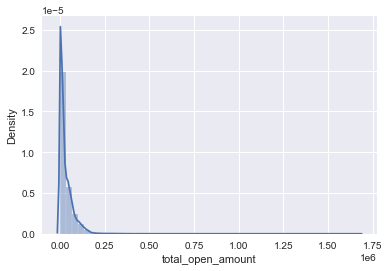

In [42]:
sns.distplot(x_train['total_open_amount']) #distribution of the amount(we can see the distribution is right skewed)

In [43]:
# The graph is Right Skewed: log transformation is needed.
'''
In general, for right-skewed data, the log-transformation may make it either right-or left-skewed. If the original 
data does follow a log-normal distribution, the log-transformed data will follow or approximately follow the normal 
distribution.
'''
import numpy as np
def Transform(x):
    return np.log(x)

x_train['total_open_amount'] = x_train['total_open_amount'].apply(Transform)
x_test['total_open_amount'] = x_test['total_open_amount'].apply(Transform)

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

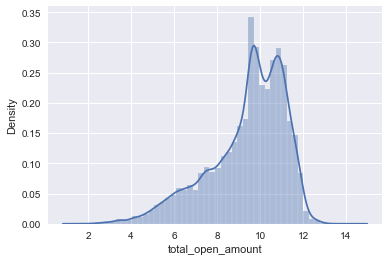

In [44]:
sns.distplot(x_train['total_open_amount']) #distribution of the amount(we can see the distribution is right skewed)

In [45]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,business_code1,cust_number1
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,USD,9.178870,2019-05-11,NAH4,1.929290e+09,0,-5,31805,8471
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,USD,9.591234,2019-02-17,NAH4,1.928800e+09,0,-5,31805,8471
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,USD,8.596136,2019-03-24,NAGD,1.929015e+09,0,1,31805,284
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,USD,9.592523,2019-08-26,NAX2,1.929791e+09,0,32,31805,498
6,CA02,140106408,WAL-M us,2019-08-03,2019,2960529706,18-02-2019,2019-02-18,2019-02-28,CAD,9.644774,2019-02-18,CA10,2.960530e+09,0,156,2792,374


## 3. Creating new features

In [46]:
#creating new columns in training data
x_train['year'] = x_train['document_create_date'].dt.year
x_train['month'] = x_train['document_create_date'].dt.month
x_train['day'] = x_train['document_create_date'].dt.day
x_train['week'] = x_train['document_create_date'].dt.week
x_train['which_day'] = x_train['document_create_date'].dt.dayofweek
x_train['quarter'] = x_train['document_create_date'].dt.quarter

In [47]:
#creating new columns in testing data
x_test['year'] = x_test['document_create_date'].dt.year
x_test['month'] = x_test['document_create_date'].dt.month
x_test['day'] = x_test['document_create_date'].dt.day
x_test['week'] = x_test['document_create_date'].dt.week
x_test['which_day'] = x_test['document_create_date'].dt.dayofweek
x_test['quarter'] = x_test['document_create_date'].dt.quarter

In [48]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,isOpen,delay,business_code1,cust_number1,year,month,day,week,which_day,quarter
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,USD,...,0,-5,31805,8471,2019,5,10,19,4,2
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,USD,...,0,-5,31805,8471,2019,2,15,7,4,1
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,USD,...,0,1,31805,284,2019,3,22,12,4,1
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,USD,...,0,32,31805,498,2019,8,26,35,0,3
6,CA02,140106408,WAL-M us,2019-08-03,2019,2960529706,18-02-2019,2019-02-18,2019-02-28,CAD,...,0,156,2792,374,2019,2,18,8,0,1


In [49]:
x_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,invoice_id,isOpen,delay,business_code1,year,month,day,week,which_day,quarter
0,CA02,140106271,LONGO corporation,2020-02-27,2020,2960613801,10-02-2020,2020-02-10,2020-02-21,CAD,...,2.960614e+09,0,6,2792,2020,2,10,7,0,1
13,U001,CCCA02,KRAFT corporation,2020-02-28,2020,1930384514,19-01-2020,2020-01-10,2020-02-23,USD,...,1.930385e+09,0,5,31805,2020,1,10,2,4,1
17,U001,CCCA02,KRAFT llc,2020-02-28,2020,1930351602,05-01-2020,2020-01-03,2020-02-09,USD,...,1.930352e+09,0,19,31805,2020,1,3,1,4,1
23,U001,200769556,SHAM,2020-01-14,2020,1930366322,09-01-2020,2020-01-07,2020-01-24,USD,...,1.930366e+09,0,-10,31805,2020,1,7,2,1,1
37,U001,200772670,ASSOCIAT foundation,2020-04-02,2020,1930429974,22-01-2020,2020-01-22,2020-02-06,USD,...,1.930430e+09,0,56,31805,2020,1,22,4,2,1


## 4. Encoding the Currency column

In [50]:
invoice_curr = {'USD': 1, 'CAD': 0}
x_train['invoice_currency'] = x_train['invoice_currency'].map(invoice_curr)
x_test['invoice_currency'] = x_test['invoice_currency'].map(invoice_curr)

In [51]:
buisness = pd.get_dummies(x_train['business_code'])
buisness1 = pd.get_dummies(x_test['business_code'])

In [52]:
x_train = pd.concat([x_train, buisness], axis=1)
x_test = pd.concat([x_test, buisness1], axis=1)

In [53]:
X_train=x_train.drop(['business_code','cust_number', 'name_customer', 'doc_id', 'cust_payment_terms', 'invoice_id'], axis = 1)

X_test = x_test.drop(['business_code','cust_number', 'name_customer', 'doc_id', 'cust_payment_terms', 'invoice_id'], axis = 1)

In [54]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,year,month,day,week,which_day,quarter,CA02,U001,U013,other
1,U001,200769623,WAL-MAR co,2019-05-21,2019,1929289995,11-05-2019,2019-05-10,2019-05-26,1,...,2019,5,10,19,4,2,0,1,0,0
2,U001,200769623,WAL-MAR,2019-02-27,2019,1928799961,17-02-2019,2019-02-15,2019-03-04,1,...,2019,2,15,7,4,1,0,1,0,0
3,U001,200706844,WINC llc,2019-05-29,2019,1929014762,24-03-2019,2019-03-22,2019-05-28,1,...,2019,3,22,12,4,1,0,1,0,0
5,U001,CCU013,KRAFT F systems,2019-09-27,2019,1929791025,26-08-2019,2019-08-26,2019-08-26,1,...,2019,8,26,35,0,3,0,1,0,0
6,CA02,140106408,WAL-M us,2019-08-03,2019,2960529706,18-02-2019,2019-02-18,2019-02-28,0,...,2019,2,18,8,0,1,1,0,0,0


In [55]:
X_train.head()

,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,delay,...,year,month,day,week,which_day,quarter,CA02,U001,U013,other
1,2019-05-21,2019,11-05-2019,2019-05-10,2019-05-26,1,9.178870,2019-05-11,0,-5,...,2019,5,10,19,4,2,0,1,0,0
2,2019-02-27,2019,17-02-2019,2019-02-15,2019-03-04,1,9.591234,2019-02-17,0,-5,...,2019,2,15,7,4,1,0,1,0,0
3,2019-05-29,2019,24-03-2019,2019-03-22,2019-05-28,1,8.596136,2019-03-24,0,1,...,2019,3,22,12,4,1,0,1,0,0
5,2019-09-27,2019,26-08-2019,2019-08-26,2019-08-26,1,9.592523,2019-08-26,0,32,...,2019,8,26,35,0,3,0,1,0,0
6,2019-08-03,2019,18-02-2019,2019-02-18,2019-02-28,0,9.644774,2019-02-18,0,156,...,2019,2,18,8,0,1,1,0,0,0


In [56]:
#creating new feature of expected delay
X_train['clear_date']= pd.to_datetime(X_train['clear_date']) 

X_train['expected_delay'] = (X_train['due_in_date'] - X_train['baseline_create_date']).dt.days

In [57]:
X_test['clear_date']= pd.to_datetime(X_test['clear_date']) 

X_test['expected_delay'] = (X_test['due_in_date'] - X_test['baseline_create_date']).dt.days

In [58]:
X_train.head()

,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,delay,...,month,day,week,which_day,quarter,CA02,U001,U013,other,expected_delay
1,2019-05-21,2019,11-05-2019,2019-05-10,2019-05-26,1,9.178870,2019-05-11,0,-5,...,5,10,19,4,2,0,1,0,0,15
2,2019-02-27,2019,17-02-2019,2019-02-15,2019-03-04,1,9.591234,2019-02-17,0,-5,...,2,15,7,4,1,0,1,0,0,15
3,2019-05-29,2019,24-03-2019,2019-03-22,2019-05-28,1,8.596136,2019-03-24,0,1,...,3,22,12,4,1,0,1,0,0,65
5,2019-09-27,2019,26-08-2019,2019-08-26,2019-08-26,1,9.592523,2019-08-26,0,32,...,8,26,35,0,3,0,1,0,0,0
6,2019-08-03,2019,18-02-2019,2019-02-18,2019-02-28,0,9.644774,2019-02-18,0,156,...,2,18,8,0,1,1,0,0,0,10


<AxesSubplot:>

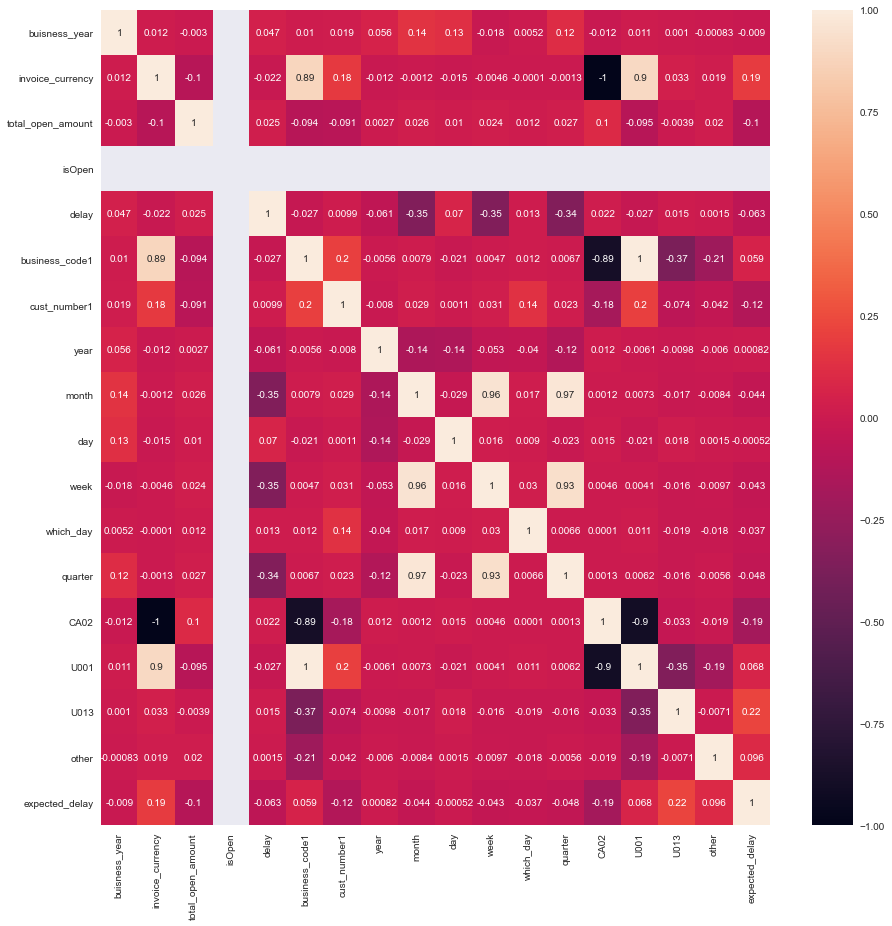

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)

In [60]:
X_train = X_train.drop(['isOpen'], axis =1)
X_test = X_test.drop(['isOpen'], axis =1)

<AxesSubplot:>

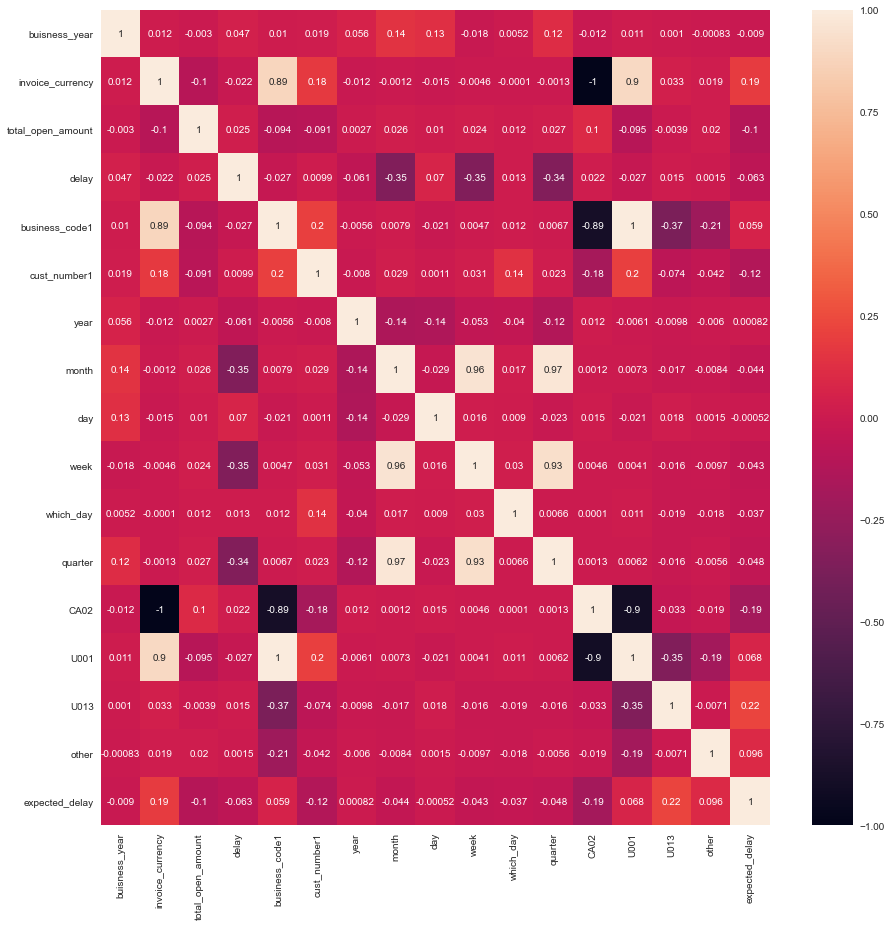

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)

In [62]:
X_train = X_train.drop(['clear_date', 'posting_date', 'document_create_date', 'baseline_create_date','due_in_date'], axis = 1)

In [63]:
X_test = X_test.drop(['clear_date', 'posting_date', 'document_create_date', 'baseline_create_date','due_in_date'], axis = 1)

In [64]:
X_train = X_train.drop(['CA02', 'week', 'U001'], axis = 1)

X_test = X_test.drop(['CA02', 'week', 'U001'], axis = 1)

In [76]:
y_train = X_train['delay']
X_train = X_train.drop(['delay'], axis = 1)

KeyError: 'delay'

In [77]:
y_test = X_test['delay']
X_test = X_test.drop(['delay'], axis = 1)

KeyError: 'delay'

In [85]:
X_train.columns 

Index(['buisness_year', 'invoice_currency', 'total_open_amount',
       'business_code1', 'year', 'month', 'day', 'which_day', 'quarter',
       'U013', 'other', 'expected_delay'],
      dtype='object')

In [86]:
X_test.columns

Index(['buisness_year', 'invoice_currency', 'total_open_amount',
       'business_code1', 'year', 'month', 'day', 'which_day', 'quarter',
       'U013', 'other', 'expected_delay'],
      dtype='object')

# Regression ML Model

## 1. Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
reg1 = LinearRegression()

In [89]:
reg1.fit(X_train,y_train)

LinearRegression()

In [90]:
print('Coefficients: ', reg1.coef_)

Coefficients:  [ 9.95209625e+01 -2.33137583e+03  1.32789253e+00  8.02648496e-02
 -1.21694607e+02 -8.86594263e+00  2.96634573e-01  5.23733687e-01
 -4.10813765e+00  2.53760133e+03  2.55093121e+03 -6.83216373e-01]


In [91]:
y_pred = reg1.predict(X_test)

In [92]:
accuracy1 = round(reg1.score(X_train, y_train)*100,2)
print(round(accuracy1, 2), '%')

15.29 %


In [93]:
accuracy1 = round(reg1.score(X_test, y_test)*100,2)
print(round(accuracy1, 2), '%')

-7.26 %


## 2. Lasso Regression

In [94]:
from sklearn.linear_model import Lasso

In [95]:
reg2 = Lasso(alpha=0.1)

In [98]:
reg2.fit(X_train,y_train)

Lasso(alpha=0.1)

In [99]:
y_pred1 = reg2.predict(X_test)

In [100]:
print('Coefficients: ', reg2.coef_)

Coefficients:  [ 8.54397191e+01  4.61288566e+00  1.27673866e+00 -2.96715103e-04
 -1.05481880e+02 -8.78915758e+00  3.38422946e-01  5.18052317e-01
 -3.95945151e+00  2.40339901e+00 -0.00000000e+00 -6.57502052e-01]


In [101]:
accuracy2 = round(reg2.score(X_train, y_train)*100,2)
print(round(accuracy2, 2), '%')

15.24 %


In [102]:
accuracy2 = round(reg2.score(X_test, y_test)*100,2)
print(round(accuracy2, 2), '%')

-5.79 %


## 3. Ridge Regression

In [126]:
from sklearn.linear_model import Ridge

In [127]:
reg3 = Ridge(alpha=1.0)

In [128]:
reg3.fit(Xtrain, ytrain)

Ridge()

In [129]:
y_pred2 = reg3.predict(Xtest)

In [130]:
accuracy3 = round(reg3.score(Xtrain, ytrain)*100,2)
print(round(accuracy3, 2), '%')

15.4 %


In [131]:
accuracy3 = round(reg3.score(Xtest, ytest)*100,2)
print(round(accuracy3, 2), '%')

14.86 %


## 4. Elastic Net

In [132]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

In [133]:
reg4=ElasticNet(normalize=True)
search=GridSearchCV(estimator=reg4,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [134]:
search.fit(Xtrain,ytrain)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


6777.516648844166

In [202]:
elastic=ElasticNet(normalize=True,alpha=1e-5,l1_ratio=0.8)

In [203]:
elastic.fit(Xtrain,ytrain)

ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [204]:
y_pred3 = elastic.predict(Xtest)

In [205]:
accuracy4 = round(elastic.score(Xtrain, ytrain)*100,2)
print(round(accuracy4, 2), '%')

15.28 %


In [206]:
accuracy4 = round(elastic.score(Xtest, ytest)*100,2)
print(round(accuracy4, 2), '%')

14.67 %


## 5. Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor 

In [208]:
reg5 = DecisionTreeRegressor( ) 

In [209]:
reg5.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [210]:
y_pred4 = reg5.predict(Xtest)

In [211]:
accuracy5 = round(reg5.score(Xtrain, ytrain)*100,2)
print(round(accuracy5, 2), '%')

99.95 %


In [212]:
accuracy5 = round(reg5.score(Xtest, ytest)*100,2)
print(round(accuracy5, 2), '%')

19.08 %


## 6. Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
reg6 = RandomForestRegressor(n_estimators=500, random_state = 42)

In [73]:
reg6.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [75]:
y_pred5 = reg6.predict(X_test)

In [76]:
accuracy6 = round(reg6.score(X_train, y_train)*100,2)
print(round(accuracy6, 2), '%')

93.86 %


In [77]:
accuracy6 = round(reg6.score(X_test, y_test)*100,2)
print(round(accuracy6, 2), '%')

12.79 %


From above acuracy scores we can see that the random forest performed better compared to reamining regression models.

## Hyperparameter Optimization

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [394]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 55, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 255, 311, 366, 422, 477, 533, 588, 644, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 19, 23, 28, 32, 37, 41, 46, 50, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [137]:
# First create the base model to tune
regressor = RandomForestRegressor() # Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

NameError: name 'random_grid' is not defined

In [397]:
rf_random.fit(Xtrain, ytrain) # Fit the random search model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 19, 23, 28, 32,
                                                      37, 41, 46, 50, 55,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 255, 311, 366,
                                                         422, 477, 533, 588,
                                                         644, 700]},
                   random_state=42, verbose=2)

In [398]:
rf_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 23,
 'bootstrap': True}

In [138]:
reg6 = RandomForestRegressor(n_estimators = 311, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto',
                                      max_depth = 23, bootstrap = True)

In [139]:
reg6.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=23, min_samples_leaf=4, n_estimators=311)

In [140]:
accuracy6 = round(reg6.score(Xtrain, ytrain)*100,2)
print(round(accuracy6, 2), '%')

76.84 %


In [141]:
accuracy6 = round(reg6.score(Xtest, ytest)*100,2)
print(round(accuracy6, 2), '%')

55.0 %


In [142]:
data = reg6.predict(Xtest)
data[0:10]

array([  -2.30526941,   10.01207595,   13.46871797,    1.44929171,
         -1.36320591,   -9.0780158 ,   90.59466458,   -5.12909269,
         -1.59036103, -199.76640012])

In [143]:
def Prediction(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("Payment done before due date.")
        elif i<10:
            temp.append("Payment done before 10 days after due date")
        elif i > 15:
            temp.append("Payment done 15 days after due date.")
        elif i > 30:
            temp.append("Payment done 30 days after due date.")
        else:
            temp.append("Payment done much after due date.")
    return temp

func = Prediction(data)
bucket = pd.DataFrame()
bucket['Predictions'] = data
bucket['Bucket_list'] = func
bucket.head()

,Predictions,Bucket_list
0,-2.305269,Payment done before due date.
1,10.012076,Payment done much after due date.
2,13.468718,Payment done much after due date.
3,1.449292,Payment done before 10 days after due date
4,-1.363206,Payment done before due date.


## 7. Artificial Neural Network

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [145]:
Xtrain.shape

(28142, 13)

In [146]:
ytrain.shape

(28142,)

In [147]:
ytrain.head()

27219     4
40895    33
36100     0
36290     1
19355    19
Name: delay, dtype: int64

In [148]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_nn_train = sc.fit_transform(Xtrain)
X_nn_test = sc.transform(Xtest)

In [149]:
ytrain.shape

(28142,)

In [237]:
n_features = Xtrain.shape[1]

In [244]:
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [246]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [255]:
model.compile(loss='mse', optimizer='adam',metrics=["accuracy"])

In [257]:
nn = model.fit(Xtrain, ytrain, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
 - 1s - loss: 15443.8826 - acc: 0.0060
Epoch 2/30
 - 1s - loss: 12765.1282 - acc: 0.0059
Epoch 3/30
 - 1s - loss: 25434.3915 - acc: 0.0074
Epoch 4/30
 - 1s - loss: 9671.2019 - acc: 0.0071
Epoch 5/30
 - 1s - loss: 37312.2109 - acc: 0.0064
Epoch 6/30
 - 2s - loss: 9926.6001 - acc: 0.0080
Epoch 7/30
 - 1s - loss: 14358.4056 - acc: 0.0069
Epoch 8/30
 - 1s - loss: 9251.3375 - acc: 0.0060
Epoch 9/30
 - 1s - loss: 16525.7989 - acc: 0.0072
Epoch 10/30
 - 1s - loss: 16775.6473 - acc: 0.0060
Epoch 11/30
 - 2s - loss: 9749.5986 - acc: 0.0068
Epoch 12/30
 - 1s - loss: 11460.8624 - acc: 0.0058
Epoch 13/30
 - 1s - loss: 11812.9918 - acc: 0.0061
Epoch 14/30
 - 1s - loss: 11634.1696 - acc: 0.0064
Epoch 15/30
 - 1s - loss: 10716.8406 - acc: 0.0066
Epoch 16/30
 - 1s - loss: 34075.6944 - acc: 0.0059
Epoch 17/30
 - 1s - loss: 8909.2938 - acc: 0.0073
Epoch 18/30
 - 1s - loss: 19472.3668 - acc: 0.0067
Epoch 19/30
 - 1s - loss: 8917.7686 - acc: 0.0062
Epoch 20/30
 - 1s - loss: 23398.7874 - acc: 0.

In [258]:
yhat = model.predict(Xtest)